<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./334_stratospheric_ozone_Arctic_2020_Metop-ABC_IASI_O3_L2.ipynb"><< 334 - Arctic Ozone hole 2020 - Metop-A/B/C IASI L2</a>

<div class="alert alert-block alert-warning">
<b>30 - CASE STUDIES - STRATOSPHERIC OZONE</b></div>

<div class="alert alert-block alert-warning">

<b>PREREQUISITES </b>

**20 - DATA EXPLORATION** modules:
  * [261 - CAMS Global Reanalysis EAC4 - Organic Matter Aerosol Optical Depth - Load and browse](../20_data_exploration/261_CAMS_EAC4_OMAOD_load_browse.ipynb) 


It is recommended to go through this module before you start with this one.
</div>

<hr>

## 3.3.5 CAMS Global Reanalysis (EAC4) - Stratospheric Ozone - March 2020

This notebook gives an example how `CAMS Global Reanalysis (EAC4)` data can be used to analyse and animate the Arctic ozone hole in March 2020.

The notebook has the following outline:
* [Load CAMS Global Reanalysis (EAC4) data for March 2020](#loac_eac4)
* [Visualize the ozone data for one time step with pcolormesh](#visualize_eac4)
* [Animate the total column ozone over the 31 day reanalysis period](#animate_eac4)

#### Load required libraries

In [1]:
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.axes import Axes

from IPython.display import HTML

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='loac_eac4'></a>Load CAMS Global Reanalysis (EAC4) data for March 2020

You can load the `CAMS Global Reanalysis (EAC4)` data with xarray's function `open_dataset()`. The example data has three dimensions, `latitude`, `longitude` and `time`. You can also see that the data has 62 time steps, with a 12 hourly time step from 01 to 31 March 2020.

In [3]:
cams_fc = '../eodata/cams/eac4/adaptor.marsdev.internal-1620311787.9760592-16395-8-99a89c3a-c21d-4692-abf7-29979acebcf8.nc'
cams_fc_xr = xr.open_dataset(cams_fc)
cams_fc_xr

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 62)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2020-03-01 ... 2020-03-31T12:00:00
Data variables:
    gtco3      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-06 14:36:28 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

### Load the ozone data variable as `xarray.DataArray`

`gtco3` is the variable name you would like to load as `xarray.DataArray`. Once you loaded the variable, you can see that the data is disseminated in the unit `kg m**-2`.

In [4]:
cams_o3 = cams_fc_xr['gtco3']
cams_o3

<xarray.DataArray 'gtco3' (time: 62, latitude: 241, longitude: 480)>
[7172160 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2020-03-01 ... 2020-03-31T12:00:00
Attributes:
    units:          kg m**-2
    long_name:      GEMS Total column ozone
    standard_name:  atmosphere_mass_content_of_ozone

### Convert from `kg m**-2` to `Dobson Unit`

Ozone data are often represented in `Dobson Unit`. By dividing the data values with the factor `2.1415*1e-5`, you can easily convert the total column Ozone data from `kg m**-2` to `Dobson Unit`.

In [5]:
cams_o3_du = cams_o3 / (2.1415*1e-5)
cams_o3_du

<xarray.DataArray 'gtco3' (time: 62, latitude: 241, longitude: 480)>
array([[[295.69998, 295.69998, 295.69998, ..., 295.69998, 295.69998,
         295.69998],
        [296.5174 , 296.558  , 296.59863, ..., 296.39554, 296.43616,
         296.47678],
        [296.2229 , 296.30414, 296.38538, ..., 295.97922, 296.06046,
         296.1417 ],
        ...,
        [307.59085, 307.62637, 307.667  , ..., 307.46393, 307.50455,
         307.55023],
        [306.43326, 306.45358, 306.47388, ..., 306.37234, 306.39264,
         306.41296],
        [306.12354, 306.12354, 306.12354, ..., 306.12354, 306.12354,
         306.12354]],

       [[294.94852, 294.94852, 294.94852, ..., 294.94852, 294.94852,
         294.94852],
        [295.41055, 295.42072, 295.4258 , ..., 295.3852 , 295.39532,
         295.4004 ],
        [296.7205 , 296.7408 , 296.75604, ..., 296.6697 , 296.69003,
         296.70526],
...
        [261.13922, 261.06305, 260.9818 , ..., 261.35754, 261.28644,
         261.2103 ],
        [256.48846, 256.44785, 256.4123 , ..., 256.60016, 256.56464,
         256.52402],
        [252.10683, 252.10683, 252.10683, ..., 252.10683, 252.10683,
         252.10683]],

       [[252.45712, 252.45712, 252.45712, ..., 252.45712, 252.45712,
         252.45712],
        [258.38736, 258.36197, 258.33658, ..., 258.45337, 258.43304,
         258.40768],
        [264.31247, 264.2668 , 264.216  , ..., 264.44452, 264.4039 ,
         264.3582 ],
        ...,
        [265.66812, 265.60718, 265.54626, ..., 265.83566, 265.7798 ,
         265.72397],
        [260.007  , 259.97653, 259.94608, ..., 260.08823, 260.06284,
         260.03238],
        [255.90459, 255.90459, 255.90459, ..., 255.90459, 255.90459,
         255.90459]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2020-03-01 ... 2020-03-31T12:00:00

## <a id='visualize_eac4'></a>Visualize the ozone data for one time step with `pcolormesh`

Now, the data is already prepared in a way that you can visualize one time step of the loaded data array. You can use the function [visualize_pcolormesh()](../functions.ipynb#visualize_pcolormesh), which makes use of matplotlib's pcolormesh function and the Python library [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) to visualize the data.

With `?visualize_pcolormesh`, you can open the function's docstring in order to see the keyword arguments required by the function.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'GEMS Total column ozone 2020-03-26T00:00:00.000000000'}>)

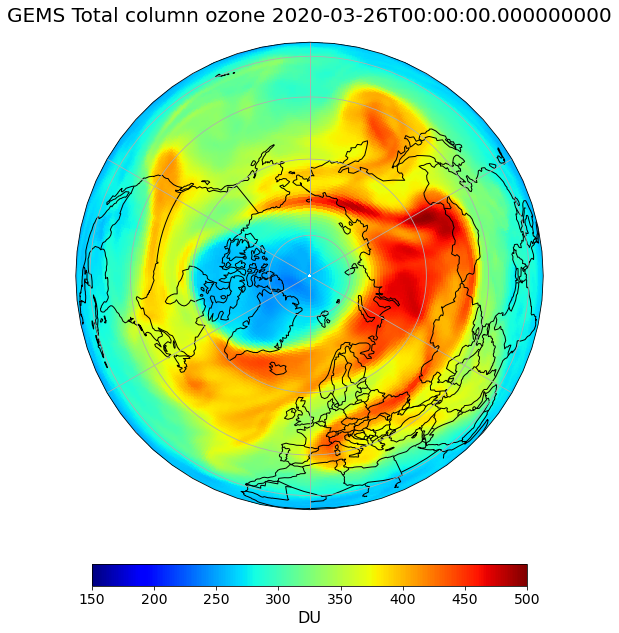

In [6]:
visualize_pcolormesh(data_array = cams_o3_du[50,:,:],
                    longitude = cams_o3_du.longitude,
                    latitude = cams_o3_du.latitude,
                    projection = ccrs.Orthographic(0,90),
                    color_scale = 'jet', 
                    unit = 'DU',
                    long_name = cams_o3.long_name + " " + str(cams_o3_du.time[50].data),
                    vmin = 150, 
                    vmax = 500)

## <a id='animate_eac4'></a>Animate the total column ozone over the 31 day reanalysis period

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you have defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generated `animate.FuncAnimation` object and convert it to a HTML5 video with the function `to_html5_video`.

In [7]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=cams_o3_du[0,:,:],
                               longitude=cams_o3_du.longitude, 
                               latitude=cams_o3_du.latitude,
                               projection=ccrs.Orthographic(0,90), 
                               color_scale='jet', 
                               unit='DU',
                               long_name=cams_o3.long_name + ' '+ str(cams_o3_du.time[0].data), 
                               vmin=150,
                               vmax=500)

frames = 62

def draw(i):
    img = plt.pcolormesh(cams_o3_du.longitude, 
                         cams_o3_du.latitude, 
                         cams_o3_du[i,:,:], 
                         cmap='jet', 
                         transform=ccrs.PlateCarree(),
                         vmin=150,
                         vmax=500)
    
    ax.set_title(cams_o3.long_name + ' '+ str(cams_o3_du.time[i].data), fontsize=20, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

#### Play the animation as HTML5 video

In [8]:
HTML(ani.to_html5_video())

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./334_stratospheric_ozone_Arctic_2020_Metop-ABC_IASI_O3_L2.ipynb"><< 334 - Arctic Ozone hole 2020 - Metop-A/B/C IASI L2</a>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>